# Analise morfologica - Julia 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Carregar os dados
df = pd.read_excel("Dados filtrados do Sholl.xlsx")
print(df)

      Grupo                                   ID  x center (px)  \
0    c3h 2h                c3h 2h 12klux pc3.5.1             42   
1    c3h 2h                c3h 2h 12klux pc3.5.2             57   
2    c3h 2h                c3h 2h 12klux pc3.5.3             48   
3    c3h 2h                c3h 2h 12klux pc3.5.4             50   
4    c3h 2h                c3h 2h 12klux pc3.5.5             57   
..      ...                                  ...            ...   
167  c3h 5h  ju c3h 5h pc 2.2.1501-1.tif (green)            176   
168  c3h 5h  ju c3h 5h pc 2.2.1501-2.tif (green)            244   
169  c3h 5h  ju c3h 5h pc 2.2.1501-3.tif (green)            173   
170  c3h 5h  ju c3h 5h pc 2.2.1501-4.tif (green)             72   
171  c3h 5h  ju c3h 5h pc 2.2.1501-5.tif (green)            178   

     y center (px)  ending radius  intersecting radii  sum. inters.  \
0               48         68.418                   5            12   
1               50         82.807                   4

In [3]:
# 2. Selecionar colunas
dados = df[['x center (px)', 'y center (px)', 'ending radius', 'intersecting radii', 'sum. inters.', 
            'mean inters.', 'median inters.', 'skewness (sampled)', 'kurtosis (sampled)', 'max inters.', 
            'max inters. radius', 'ramification index (sampled)', 'centroid radius', 'centroid value', 
            'enclosing radius', 'critical value', 'critical radius', 'mean value', 'ramification index (fit)', 
            'skewness (fit)', 'kurtosis (fit)', 'polyn. degree', 'polyn. R^2', 'determination ratio', 
            'regression coefficient (semi-log)', 'regression intercept (semi log)', 'regression R^2 (semi-log)']]


## 1. Avaliação dos dados por variancia e correlação

Cultura de c3h expostas por 2h e 5h de luz (12,000 lux) e controle (dark)

In [4]:
# Calcular a variância das colunas (exceto 'Grupo')
variances = dados.var()

# Ordenar as colunas pela variância em ordem decrescente
variances_sorted = variances.sort_values(ascending=False)

# Exibir as variâncias ordenadas
print("Variância das colunas (ordenadas de maior para menor):")
print(variances_sorted)

Variância das colunas (ordenadas de maior para menor):
ending radius                        1.401606e+08
critical radius                      2.979668e+07
regression intercept (semi log)      5.976415e+05
mean inters.                         1.324084e+05
critical value                       1.287209e+05
mean value                           7.177277e+04
median inters.                       3.627419e+04
determination ratio                  2.744601e+04
kurtosis (fit)                       2.006288e+04
kurtosis (sampled)                   1.875445e+04
regression R^2 (semi-log)            1.687933e+04
polyn. R^2                           1.643188e+04
ramification index (sampled)         9.804225e+03
ramification index (fit)             7.625073e+03
skewness (sampled)                   6.127043e+03
skewness (fit)                       5.676490e+03
enclosing radius                     3.068237e+03
x center (px)                        2.082859e+03
y center (px)                        1.937336

In [5]:
# Verificar se há valores NaN ou infinitos no conjunto de dados
print("Verificando valores inválidos (NaN ou Inf)...")
print(dados.isnull().sum())  # Contar quantos valores NaN existem em cada coluna
print(np.isinf(dados).sum())  # Contar quantos valores infinitos existem em cada coluna

Verificando valores inválidos (NaN ou Inf)...
x center (px)                        0
y center (px)                        0
ending radius                        0
intersecting radii                   0
sum. inters.                         0
mean inters.                         0
median inters.                       0
skewness (sampled)                   0
kurtosis (sampled)                   0
max inters.                          0
max inters. radius                   0
ramification index (sampled)         0
centroid radius                      1
centroid value                       0
enclosing radius                     0
critical value                       0
critical radius                      0
mean value                           0
ramification index (fit)             0
skewness (fit)                       1
kurtosis (fit)                       1
polyn. degree                        1
polyn. R^2                           1
determination ratio                  1
regression coeffic

In [7]:
# Criar uma cópia explícita do DataFrame
dados = dados.copy()

# Substituir valores infinitos por NaN
dados.replace([np.inf, -np.inf], np.nan, inplace=True)

# Preencher os valores NaN com a média da coluna ou remover as linhas com NaN
dados.fillna(dados.mean(), inplace=True)  # Substitui NaN pela média de cada coluna

# Normalizar os dados (exceto a coluna 'Grupo')
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dados)

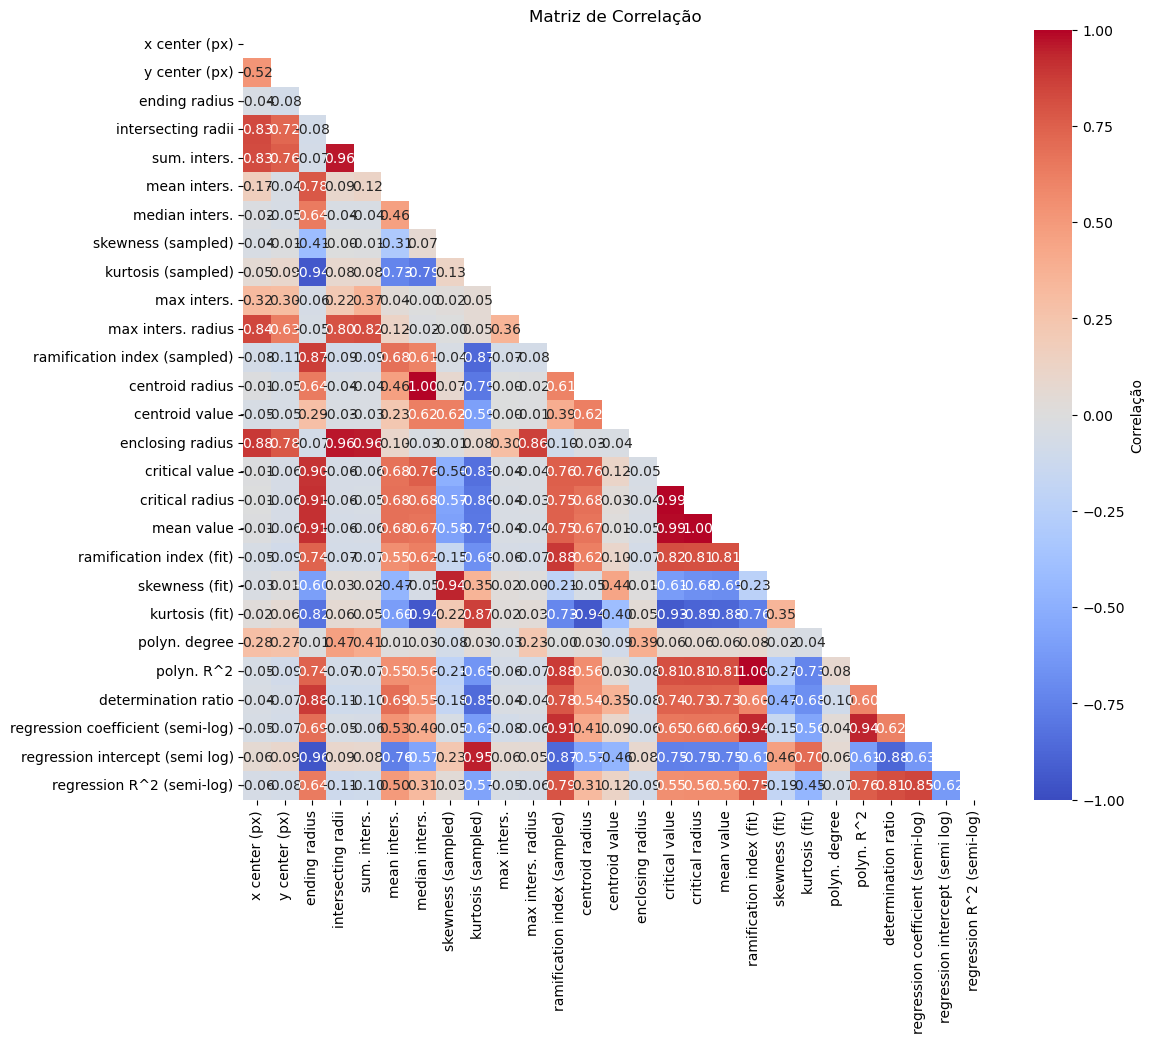

In [8]:
# Gerar a matriz de correlação
corr_matrix = np.corrcoef(normalized_data, rowvar=False)

# Criar um DataFrame para a matriz de correlação
corr_df = pd.DataFrame(corr_matrix, index=dados.columns, columns=dados.columns)

# Filtrar valores de correlação maiores que ±0.8
mask = np.triu(np.ones_like(corr_df, dtype=bool))  # Para ocultar valores duplicados no heatmap
filtered_corr_df = corr_df[(corr_df > 0.8) | (corr_df < -0.8)]

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, fmt='.2f', mask=mask, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação')
plt.show()

Pela variancia e correlação muito alta, serão retirados as caracteristicas:

max inters.\
centroid radius                               
centroid value \
ramification index (fit) 

# 2. Analise de UMAP
    Será retirado 3 caracteristicas. Em seguida será realizado a analise de UMAP. 
    Pela analise de UMAP não conseguismos encontrar um padrão na distribuição das amostras, então não vamos usar esse resultado. 

In [10]:
# Separar os grupos
grupo_2h = df[df['Grupo'] == 'c3h 2h'].index
grupo_controle = df[df['Grupo'] == 'c3h controle'].index
grupo_5h = df[df['Grupo'] == 'c3h 5h'].index

# Selecionar colunas específicas
dado = df[['x center (px)', 'y center (px)', 'ending radius', 'intersecting radii', 'sum. inters.', 
            'mean inters.', 'median inters.', 'skewness (sampled)', 'kurtosis (sampled)',
            'max inters. radius', 'ramification index (sampled)',
            'enclosing radius', 'critical value', 'critical radius', 'mean value',
            'skewness (fit)', 'kurtosis (fit)', 'polyn. degree', 'polyn. R^2', 'determination ratio', 
            'regression coefficient (semi-log)', 'regression intercept (semi log)', 'regression R^2 (semi-log)']]

# Criar uma cópia explícita do DataFrame
dado = dado.copy()

# Substituir valores infinitos por NaN
dado.replace([np.inf, -np.inf], np.nan, inplace=True)

# Preencher os valores NaN com a média da coluna ou remover as linhas com NaN
dado.fillna(dado.mean(), inplace=True)  # Substitui NaN pela média de cada coluna

# Normalizar os dados (exceto a coluna 'Grupo')
scaler = StandardScaler()
normal_data = scaler.fit_transform(dado)

/Users/gabrielibovi/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


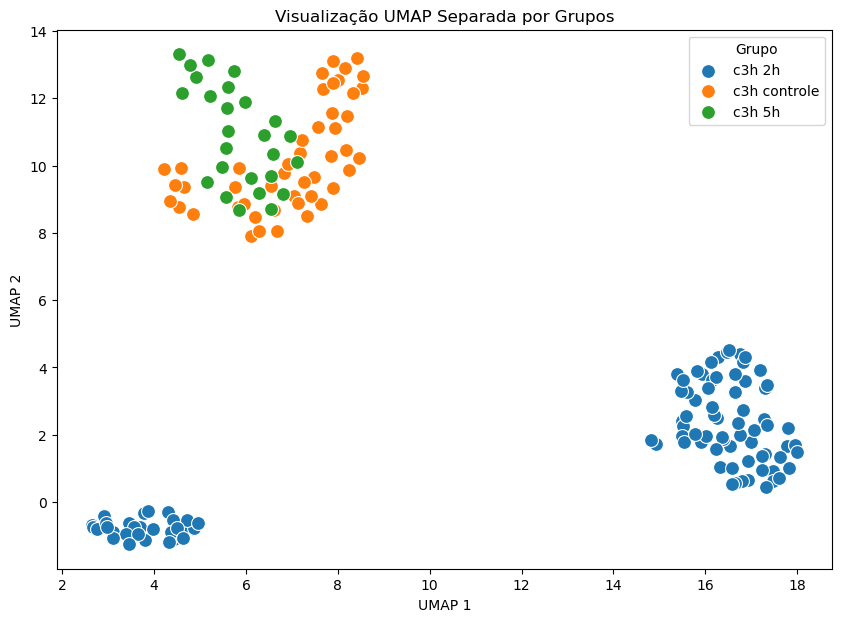

In [30]:
# Normalizar os dados
scaler = StandardScaler()
normal_data = pd.DataFrame(scaler.fit_transform(dado), columns=dado.columns, index=dado.index)

# 9. Rodar o UMAP com as características selecionadas para cada grupo
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)

# Rodar UMAP para o grupo c3h 2h
umap_data_2h = umap_model.fit_transform(normal_data.loc[grupo_2h])

# Rodar UMAP para o grupo c3h controle
umap_data_controle = umap_model.fit_transform(normal_data.loc[grupo_controle])

# Rodar UMAP para o grupo c3h 5h
umap_data_5h = umap_model.fit_transform(normal_data.loc[grupo_5h])

# 10. Plotar os dados UMAP para todos os grupos juntos
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_data_2h[:, 0], y=umap_data_2h[:, 1], label='c3h 2h', s=100)
sns.scatterplot(x=umap_data_controle[:, 0], y=umap_data_controle[:, 1], label='c3h controle', s=100)
sns.scatterplot(x=umap_data_5h[:, 0], y=umap_data_5h[:, 1], label='c3h 5h', s=100)
plt.title('Visualização UMAP Separada por Grupos')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Grupo', loc='best')
plt.show()

# 3. Cluster hierarquico (CH)
Antes de fazer o CH precisamos saber quantos clusters os nossos dados podem forma, para depois colocar no codigo de CH.

## Dendrograma (UMAP para reduzir a dimensão)

/Users/gabrielibovi/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


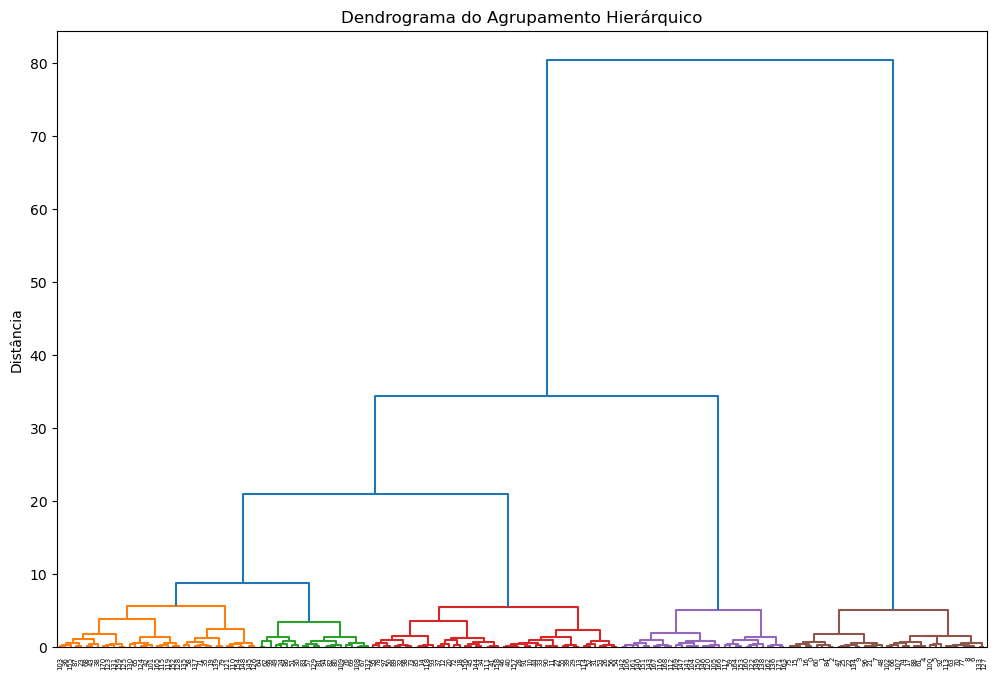

In [38]:
# Etapa 1: Reduzir a dimensão com UMAP
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(normal_data)

# Etapa 2: Realizar o agrupamento hierárquico
linked = linkage(X_umap, method='ward')

# Etapa 3: Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=8)
plt.title('Dendrograma do Agrupamento Hierárquico')
plt.ylabel('Distância')
plt.show()

## Cluster hierarquico (UMAP para reduzir a dimensão)
Com o cluster vamos ver a separação dos Grupos (pelas cores) e a formção de 4 clusters (pelos formatos), como foi decidido pelo dendrograma.

/Users/gabrielibovi/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


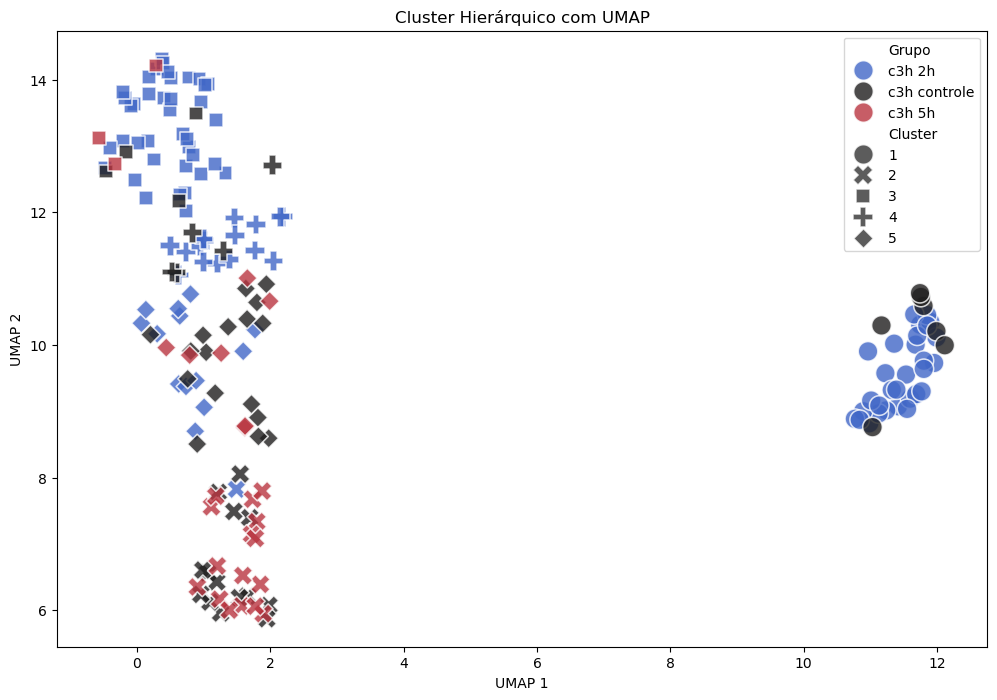

In [35]:
# Etapa 1: Reduzir a dimensão com UMAP
umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(normal_data)

# Adicionar as coordenadas UMAP ao DataFrame
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['Grupo'] = df['Grupo']

# Etapa 2: Realizar o agrupamento hierárquico
linked = linkage(X_umap, method='ward')

# Adicionar os clusters ao DataFrame
df_umap['Cluster'] = fcluster(linked, t=5, criterion='maxclust')  # Ajuste t conforme o número de clusters desejado

# Etapa 3: Plotar os clusters
plt.figure(figsize=(12, 8))

# Usar sns.scatterplot para plotar os dados UMAP
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Grupo', style='Cluster', palette='icefire', s=200, alpha=0.8)

plt.title('Cluster Hierárquico com UMAP')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

Explicação dos Passos:

    Reduzir a Dimensão com UMAP: A redução da dimensão é feita com UMAP para visualização mais fácil.

    Realizar o Agrupamento Hierárquico: Usamos o método de linkage ward para gerar a hierarquia e fcluster para atribuir os clusters. Ajuste o parâmetro t para o número desejado de clusters.

    Plotar os Clusters: Utilizamos sns.scatterplot para criar o gráfico. Aqui, hue='Grupo' separa os pontos por grupos originais, e style='Cluster' diferencia os clusters.

### Analise dos resultados de CH
A gente viu que os nosso dados podem formar até 4 clusters, mas nem todos os grupos estão em todos os clusters. Isso significa um comportamento morfologico diferente em decorrencia da luz e da mutação. Agora vamos ver qual a porcentagem da presença de cada cluster em cada grupo.

In [36]:
# Contar quantas células de cada grupo estão em cada cluster
grupo_cluster_count = df_umap.groupby(['Grupo', 'Cluster']).size().unstack(fill_value=0)

# Calcular a porcentagem de células de cada grupo em cada cluster
grupo_cluster_percentage = grupo_cluster_count.div(grupo_cluster_count.sum(axis=1), axis=0) * 100

# Exibir o resultado
print(grupo_cluster_percentage)

Cluster               1          2          3          4          5
Grupo                                                              
c3h 2h        30.303030   1.010101  39.393939  16.161616  13.131313
c3h 5h         0.000000  61.538462  11.538462   0.000000  26.923077
c3h controle  14.893617  29.787234   8.510638  10.638298  36.170213


Explicação:

    Contagem de células por grupo e cluster: Utilizamos groupby(['Grupo', 'Cluster']) para contar quantas células de cada grupo pertencem a cada cluster.
    Cálculo das porcentagens: Usamos a função div() para dividir cada contagem pela contagem total do respectivo grupo, gerando assim a porcentagem de células de cada grupo em cada cluster.
    Resultado: Isso gera uma tabela onde as linhas representam os grupos e as colunas representam os clusters, com cada célula mostrando a porcentagem de células daquele grupo que pertence ao respectivo cluster.

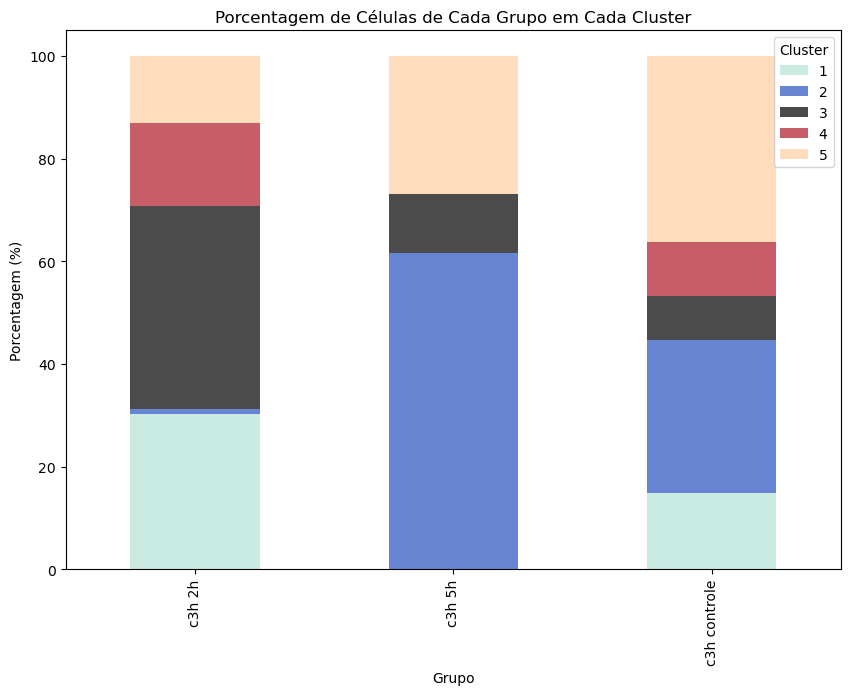

In [37]:
# Plotar gráfico de barras empilhadas para as porcentagens
grupo_cluster_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='icefire', alpha=0.8)

plt.title('Porcentagem de Células de Cada Grupo em Cada Cluster')
plt.xlabel('Grupo')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Cluster')
plt.show()

Este gráfico de barras empilhadas mostrará a distribuição percentual de células de cada grupo entre os clusters. Podemos ver que o grupo controle é muito mais diverso morfologicamente que os outros grupos, isso pode se dar pq as celulas da macroglia (celulas da glia em geral) não se encontram ativadas, mas nos outros gupos - pela mutação e luz - elas tem uma morfologia diferente. 